# Task #1 Prediction using Supervised ML

### In this notebook, our goal is to predict the percentage of a student based on the no. of study hours.

# Author : Sara Hamza 

## # Importing libraries

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [143]:
seed = 0

## # Loading Dataset

In [182]:
df = pd.read_csv('student_marks.csv')

## # Data Exploration

In [145]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [146]:
df.shape

(25, 2)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [148]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [149]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [150]:
df.duplicated().sum()

0

Since the data is devoid of any null or duplicate values, we can proceed with our analysis. Let's get started!

## # Data Analysis

Visualizing the probability density function of a continuous random variable.


Text(0.5, 1.0, 'Hours Studied KDE')

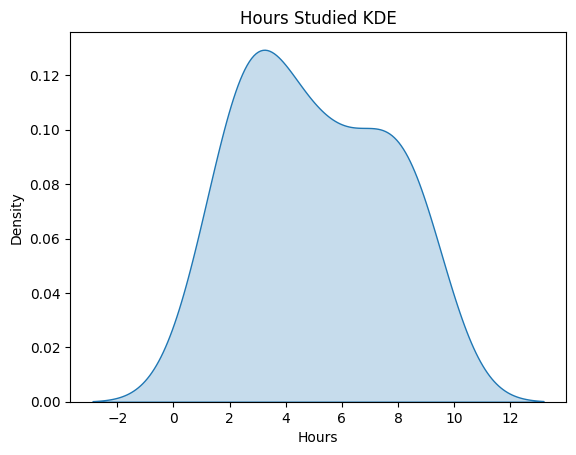

In [151]:
sns.kdeplot(df, x='Hours', fill=True)
plt.title('Hours Studied KDE')

As we can see data is normally distributed.

<Axes: >

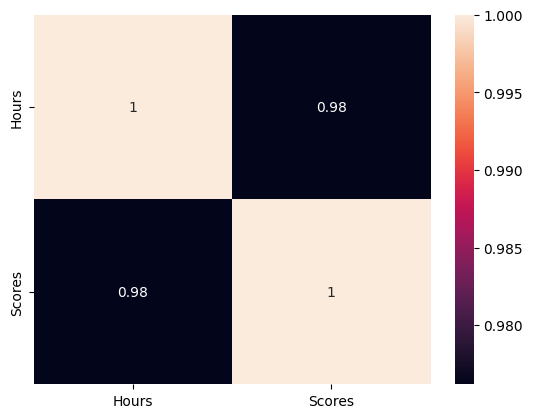

In [152]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)

There is a **+ve strong correlation** between 'Hours' and 'Scores'. Let's visualize this correclation!

Text(0, 0.5, 'percentage score')

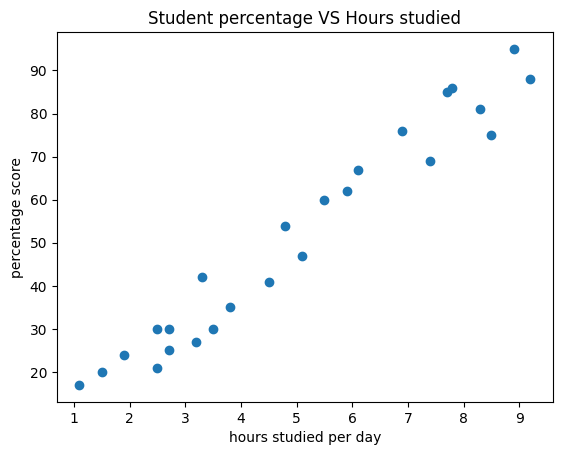

In [180]:
plt.scatter(df['Hours'], df['Scores'])
plt.title("Student percentage VS Hours studied")
plt.xlabel("hours studied per day")
plt.ylabel("percentage score")

It is evident from the visualization that the data exhibits a **strong correlation**. Therefore, employing a **linear regression** model is a suitable approach to address this task.

## # Splitting Data 

In [154]:
x = df[['Hours']].values.reshape(-1, 1)
y = df['Scores'].values

In [155]:
# split data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

In [156]:
print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (20, 1)
y train shape: (20,)
x test shape: (5, 1)
y test shape: (5,)


## # Training a Linear Regression Model

In [157]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## # Predictions

###  Training set predictions

In [158]:
y_train_pred = model.predict(x_train)
y_train_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

###  Test set predictions

In [167]:
y_test_pred = model.predict(x_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Plotting the Regressor and Data

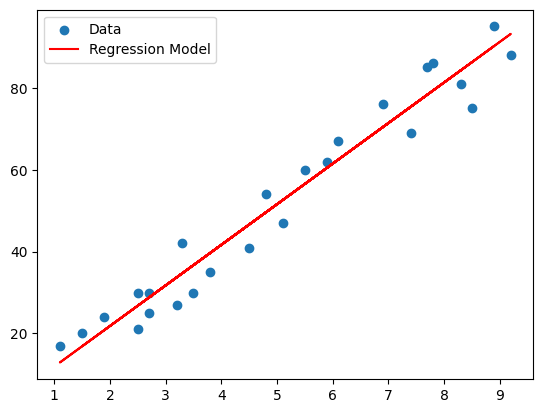

In [186]:
y_pred = model.predict(x)
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Regression Model", c='red')
plt.legend()

## # Model Accuracy and Error

### Training set accuracy and mean absolute error

In [165]:
accuracy = r2_score(y_train, y_train_pred)
print(f'Training Accuracy : {accuracy*100}%')
mae = mean_absolute_error(y_train, y_train_pred)
print(f'Training MSE : {mae}')

Training Accuracy : 95.15510725211553%
Training MSE : 5.186601709180368


### Testing set accuracy and mean absolute error

In [166]:
accuracy = r2_score(y_test, y_test_pred)
print(f'Training Accuracy : {accuracy*100}%')
mae = mean_absolute_error(y_test, y_test_pred)
print(f'Training MSE : {mae}')

Training Accuracy : 94.54906892105356%
Training MSE : 4.183859899002975


### Try yourself with your own data

Edit hours to enter your number of hours you study per day and see your predicted mark if you wish ")

In [168]:
hours = 9.25 # CHANGE THIS
x_hours = np.array(hours).reshape(-1, 1)
mark_pred = model.predict(x_hours)
print(f'Number of hours : {hours}\nPredicted mark : {mark_pred[0]}')

Number of hours : 9.25
Predicted mark : 93.69173248737538


Thank you for your time.<br>
Feel free to give your feedback. Your feedback is highly appreciated!